In [ ]:
# goal 
# use the Keras deep learning library to train your first neural network on a custom image dataset
# implement your first Convolutional Neural Network (CNN)

# most Keras tutorials use the basics of the library using an image classification dataset such as 
# MNIST (handwriting recognition) or CIFAR-10 (basic object recognition).

In [22]:
# Import Libraries
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

## argument parser - ignore

In [ ]:
# # construct the argument parser and parse the arguments
# import argparse
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True, help="path to input dataset of images")
# ap.add_argument("-m", "--model", required=True, help="path to output trained model")
# ap.add_argument("-l", "--label-bin", required=True, help="path to output label binarizer")
# ap.add_argument("-p", "--plot", required=True, help="path to output accuracy/loss plot")
# args = vars(ap.parse_args())

## Load Data from disk

In [4]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring
    # aspect ratio), flatten the image into 32x32x3=3072 pixel image
    # into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
 
    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
print("done")

[INFO] loading images...
done


In [4]:
# scale the raw pixelintensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## Split data for training and validation

In [5]:
# partition the data into 75% training and 25% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [6]:
trainX

array([[1.67627835e-03, 2.09150327e-03, 2.66051519e-03, ...,
        1.93771626e-03, 2.99884660e-03, 3.22952710e-03],
       [9.22722030e-04, 2.27604767e-03, 3.44482891e-03, ...,
        1.52249135e-03, 1.99923106e-03, 2.50672818e-03],
       [2.64513649e-03, 2.53748558e-03, 3.21414840e-03, ...,
        1.69165705e-03, 2.19915417e-03, 2.89119569e-03],
       ...,
       [9.07343329e-04, 8.61207228e-04, 8.91964629e-04, ...,
        1.23029604e-04, 1.53787005e-04, 2.76816609e-04],
       [3.81391772e-03, 3.81391772e-03, 3.81391772e-03, ...,
        3.70626682e-03, 3.66013072e-03, 3.69088812e-03],
       [1.12264514e-03, 1.18415994e-03, 1.72241446e-03, ...,
        2.15301807e-04, 1.53787005e-05, 1.53787005e-05]])

In [7]:
type(trainX)

numpy.ndarray

In [8]:
trainY

array(['Messy_Room', 'Clean_Room', 'Clean_Room', ..., 'Bad_Excuse',
       'Messy_Room', 'Messy_Room'], dtype='<U10')

In [9]:
type(trainY)

numpy.ndarray

In [10]:
# convert the labels from integers to vectors 
# (for 2-class, binary classification you should use Keras' to_categorical 
# function instead as the scikit-learn's LabelBinarizer will not return a vector)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## max_value_of_array - Specify if to_categorical

In [ ]:
# This is the category vector after transformation
# [1, 0, 0] # corresponds to cats
# [0, 1, 0] # corresponds to dogs
# [0, 0, 1] # corresponds to panda

In [ ]:
# from keras.utils.np_utils import to_categorical

# cg = to_categorical(0, 1)
# trainY = cg.fit_transform(trainY)
# testY = cg.transform(testY)

## Define Keras architecture

In [11]:
# define the 3072-1024-512-3 architecture using Keras
# Should I use "ELU" for hidden layer as image and "sigmoid" for output layer

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

## Compile Model Simple NN

In [12]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 40
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...




## Fit Model

In [13]:
# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1672 samples, validate on 558 samples
Epoch 1/40
1672/1672 [==============================] - 2s 955us/step - loss: 1.1100 - acc: 0.3864 - val_loss: 1.2197 - val_acc: 0.4229
Epoch 2/40
1672/1672 [==============================] - 1s 797us/step - loss: 1.0963 - acc: 0.3858 - val_loss: 1.0906 - val_acc: 0.4229
Epoch 3/40
1672/1672 [==============================] - 1s 806us/step - loss: 1.0936 - acc: 0.3959 - val_loss: 1.1602 - val_acc: 0.2867
Epoch 4/40
1672/1672 [==============================] - 1s 794us/step - loss: 1.0945 - acc: 0.4007 - val_loss: 1.2417 - val_acc: 0.4229
Epoch 5/40
1672/1672 [==============================] - 1s 827us/step - loss: 1.1043 - acc: 0.3882 - val_loss: 1.1135 - val_acc: 0.2903
Epoch 6/40
1672/1672 [==============================] - 1s 832us/step - loss: 1.0996 - acc: 0.3995 - val_loss: 1.1118 - val_acc: 0.2867
Epoch 7/40
1672/1672 [====================

## Evaluate Model

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

  Bad_Excuse       0.00      0.00      0.00       160
  Clean_Room       0.42      1.00      0.59       236
  Messy_Room       0.00      0.00      0.00       162

    accuracy                           0.42       558
   macro avg       0.14      0.33      0.20       558
weighted avg       0.18      0.42      0.25       558



C:\Users\regina\Desktop\Metis\Metis Projects\Spark\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


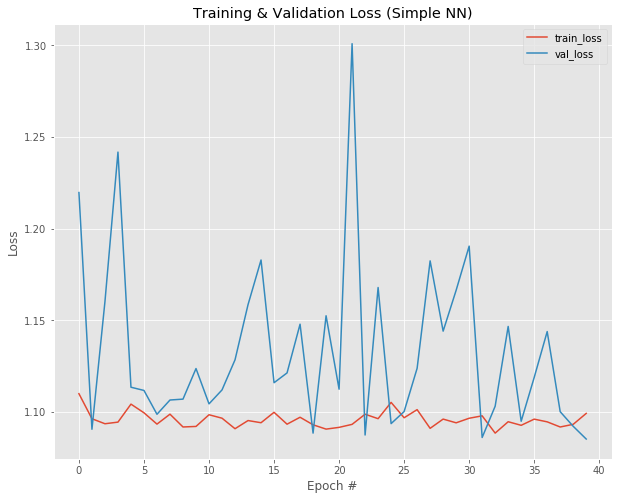

In [15]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
# plt.savefig(args["plot"])
plt.show()

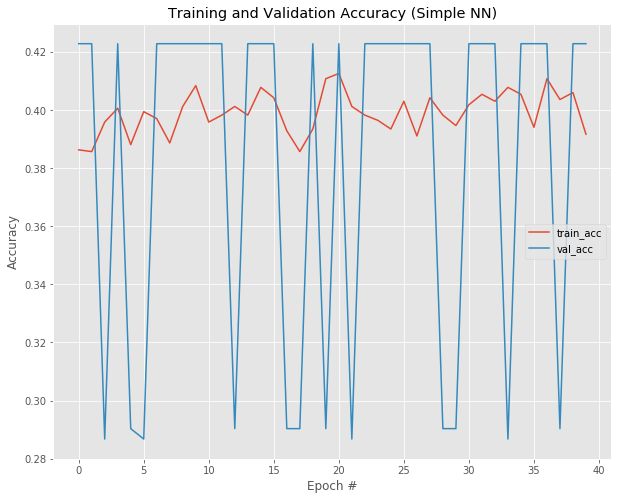

In [16]:
# plot the training and validatio accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
# plt.savefig(args["plot"])
plt.show()

## Save model

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('keras_tutorial_model.h5')
f = open('label_bin_tutorial', "wb")
f.write(pickle.dumps(lb))
f.close()

In [18]:
from keras.models import load_model

# load model
model = load_model('keras_tutorial_model.h5')

## Make predictions on new data using your Keras model

In [19]:
print (type(image))

<class 'numpy.ndarray'>


In [28]:
# import the necessary packages
from keras.models import load_model
import argparse
import pickle
import cv2
import warnings
warnings.filterwarnings("ignore")
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to input image we are going to classify")
# ap.add_argument("-m", "--model", required=True,
#     help="path to trained Keras model")
# ap.add_argument("-l", "--label-bin", required=True,
#     help="path to label binarizer")
# ap.add_argument("-w", "--width", type=int, default=28,
#     help="target spatial dimension width")
# ap.add_argument("-e", "--height", type=int, default=28,
#     help="target spatial dimension height")
# ap.add_argument("-f", "--flatten", type=int, default=-1,
#     help="whether or not we should flatten the image")
# args = vars(ap.parse_args())
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32
image = cv2.imread("images\CNNMessyRoom.jpg")
output = image.copy()

image = cv2.resize(image, (width, height))

# scale the pixel values to [0, 1]
image = image.astype("float") / 255.0
# # check to see if we should flatten the image and add a batch dimension
# if flatten > 0:
image = image.flatten()
image = image.reshape((1, image.shape[0]))
# # otherwise, we must be working with a CNN -- don't flatten the
# # image, simply add the batch dimension
# else:
#     image = image.reshape((1, image.shape[0], image.shape[1],
#         image.shape[2]))
# load the model and label binarizer
print("[INFO] loading network and label binarizer...")
model = load_model('keras_tutorial_model.h5')
lb = pickle.loads(open("label_bin.env", "rb").read())
# make a prediction on the image
preds = model.predict(image)
# find the class label index with the largest corresponding probability
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]
# draw the class label + probability on the output image
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, .7, (255, 255, 255), 2)
# show the output image
cv2.imshow("Image", output)
cv2.waitKey(0)

[INFO] loading network and label binarizer...


-1

Text(0, 0.5, 'Category')

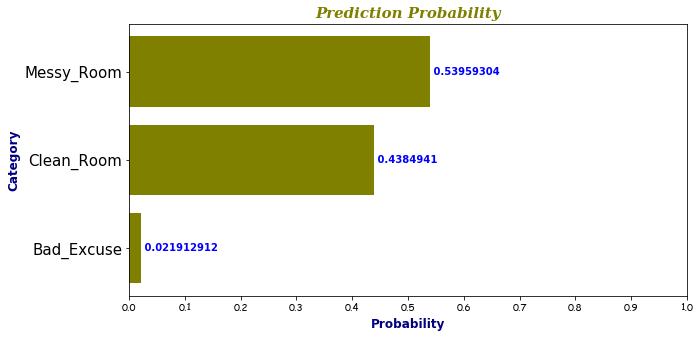

In [21]:
# plot the prediction probability for each category

plt.figure(figsize = [10,5])   # [width, height]
x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2] ]
y = [ preds[0][0], preds[0][1], preds[0][2] ]
plt.barh(x, y, color='olive')
ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )
for i, v in enumerate (y):
        plt.text(v,i," "+str(v),color = 'blue', va = 'center', fontweight = 'bold')

plt.title('Prediction Probability', family='serif', fontsize=15, style='italic', weight='bold', color='olive', loc='center', rotation=0)
plt.xlabel('Probability', fontsize=12, weight='bold', color='navy')
plt.ylabel('Category', fontsize=12, weight='bold', color='navy')

In [ ]:
cv2.imread("images\\Bad_ExcuseA.jpg")

In [ ]:
imagePaths = sorted(list(paths.list_images('dataset')))
imagePaths

## 2nd Model

In [ ]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(3072,), activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(128, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(len(lb.classes_), activation="softmax"))
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model2.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)